In [ ]:
#Context: Lung cancer is the leading cause of cancer-related deaths globally. 
Early detection is crucial for successful treatment, 
but the diagnostic process often relies on the manual interpretation of histopathological images, which can be subjective and time-consuming.

Problem: Pathologists face challenges in accurately diagnosing colon cancer due to the sheer volume of cases and the complexity of the images. 
This manual process can lead to inconsistent results, increased workloads, and delays in patient treatment.


In [1]:
import tensorflow as tf

In [2]:
data_dir = 'Colon_image_set/colon_image_sets' 

In [3]:
import numpy as np
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import os
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
# Define the mapping from folder names to binary labels
label_mapping = {
    'colon_n': 0,   # benign
    'colon_aca': 1  # malignant
}

In [5]:
# Create a list to hold image paths and labels
data = []
image_count = {0: 0, 1: 0}  # To keep track of image counts for each label

# Iterate through the folders and label the images
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        label = label_mapping.get(folder, None)
        if label is not None:
            print(f"Processing folder: {folder}")
            for image_name in os.listdir(folder_path):
                image_path = os.path.join(folder_path, image_name)
                data.append((image_path, label))
                image_count[label] += 1  # Increment the count for the corresponding label
        else:
            print(f"Warning: No label found for folder {folder}")

Processing folder: colon_aca
Processing folder: colon_n


In [6]:
# Create a DataFrame
df = pd.DataFrame(data, columns=['image_path', 'label'])

In [7]:
# Output the total number of images in each class
print("Total images found:")
print(f"Benign (0): {image_count[0]}")
print(f"Malignant (1): {image_count[1]}")

Total images found:
Benign (0): 5000
Malignant (1): 5000


In [12]:
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd


In [15]:
df['image_path'] = df['image_path'].str.replace('\\', '/', regex=False)

In [16]:
# Check if the paths exist
df['exists'] = df['image_path'].apply(os.path.exists)
print(df[['image_path', 'exists']].head())

                                          image_path  exists
0  Colon_image_set/colon_image_sets/colon_aca/col...    True
1  Colon_image_set/colon_image_sets/colon_aca/col...    True
2  Colon_image_set/colon_image_sets/colon_aca/col...    True
3  Colon_image_set/colon_image_sets/colon_aca/col...    True
4  Colon_image_set/colon_image_sets/colon_aca/col...    True


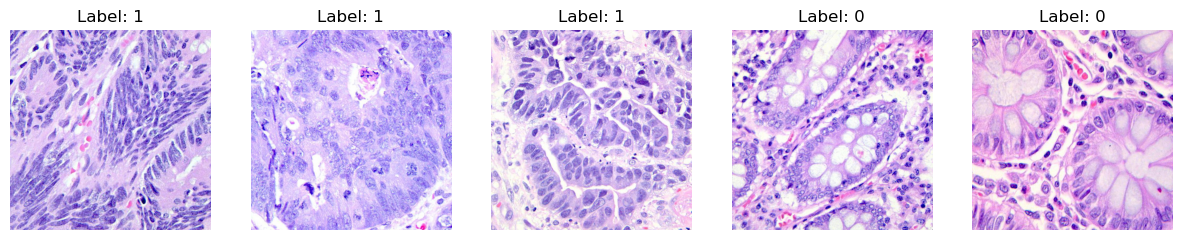

In [17]:
def display_sample_images(df, n=5):
    plt.figure(figsize=(15, 10))
    for i in range(n):
        sample = df.sample(1).iloc[0]
        if sample['exists']:  # Check if the image exists
            try:
                img = Image.open(sample['image_path'])
                plt.subplot(2, 5, i + 1)
                plt.imshow(img)
                plt.title(f"Label: {sample['label']}")
                plt.axis('off')
            except Exception as e:
                print(f"Error loading image {sample['image_path']}: {e}")
        else:
            print(f"Image not found: {sample['image_path']}")
    plt.show()

# Call the function
display_sample_images(df)


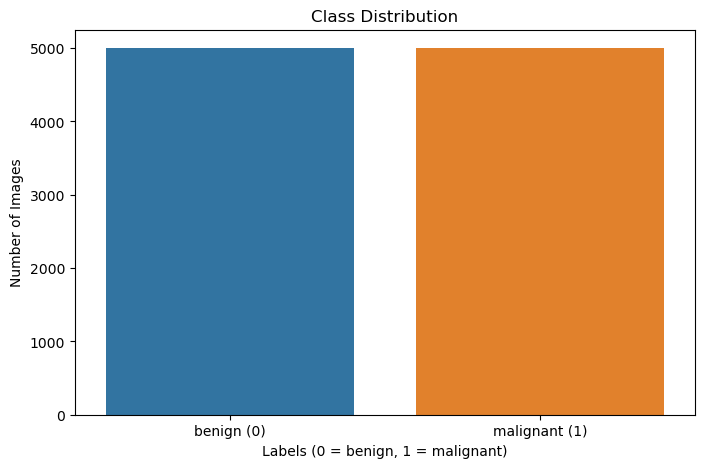

In [33]:
# Visualize the distribution of labels
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.xlabel('Labels (0 = benign, 1 = malignant)')
plt.ylabel('Number of Images')
plt.xticks(ticks=[0, 1], labels=['benign (0)', 'malignant (1)'])
plt.show()

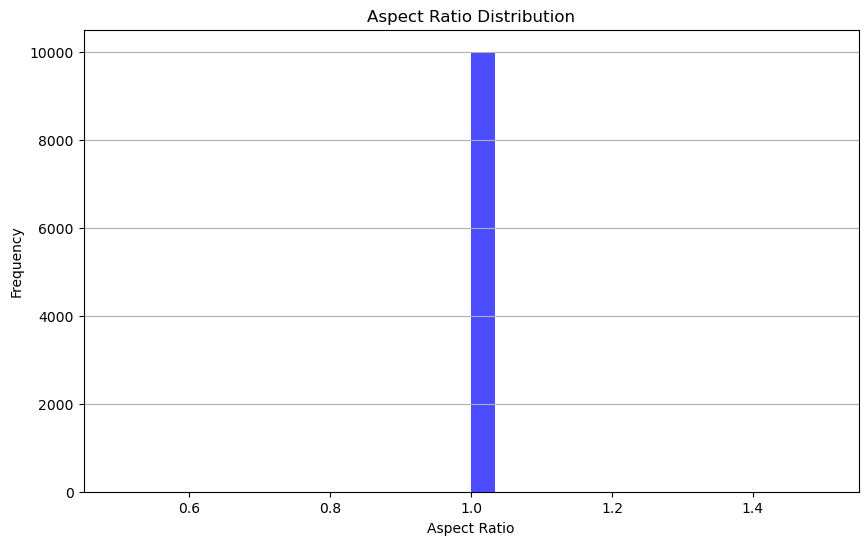

In [21]:
# Plotting the aspect ratios
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=30, color='blue', alpha=0.7)
plt.title('Aspect Ratio Distribution')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [24]:
pixel_means = []
pixel_stds = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        print(f"Processing folder: {folder}")
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
            print(f"Processing image: {image_path}")  # Debug print
            try:
                with Image.open(image_path) as img:
                    # Convert image to grayscale if needed, or use RGB directly
                    img_array = np.array(img)  # Convert to NumPy array
                    # Calculate mean and standard deviation
                    pixel_means.append(np.mean(img_array))
                    pixel_stds.append(np.std(img_array))
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")

# Convert lists to NumPy arrays for easier statistical operations if needed
pixel_means = np.array(pixel_means)
pixel_stds = np.array(pixel_stds)

# Print the overall statistics
print("Mean of pixel intensities:", np.mean(pixel_means))
print("Standard deviation of pixel intensities:", np.mean(pixel_stds))


Processing folder: colon_aca
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca10.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca100.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1000.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1001.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1002.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1003.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1004.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1005.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1006.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1007.jpeg
Processing image: Colon_image_set/colon_image_sets\colon_aca\colonca1008.jpeg
Processing image: Colon_image_set/colon_i

In [30]:
# Convert lists to NumPy arrays
pixel_means = np.array(pixel_means)
pixel_stds = np.array(pixel_stds)


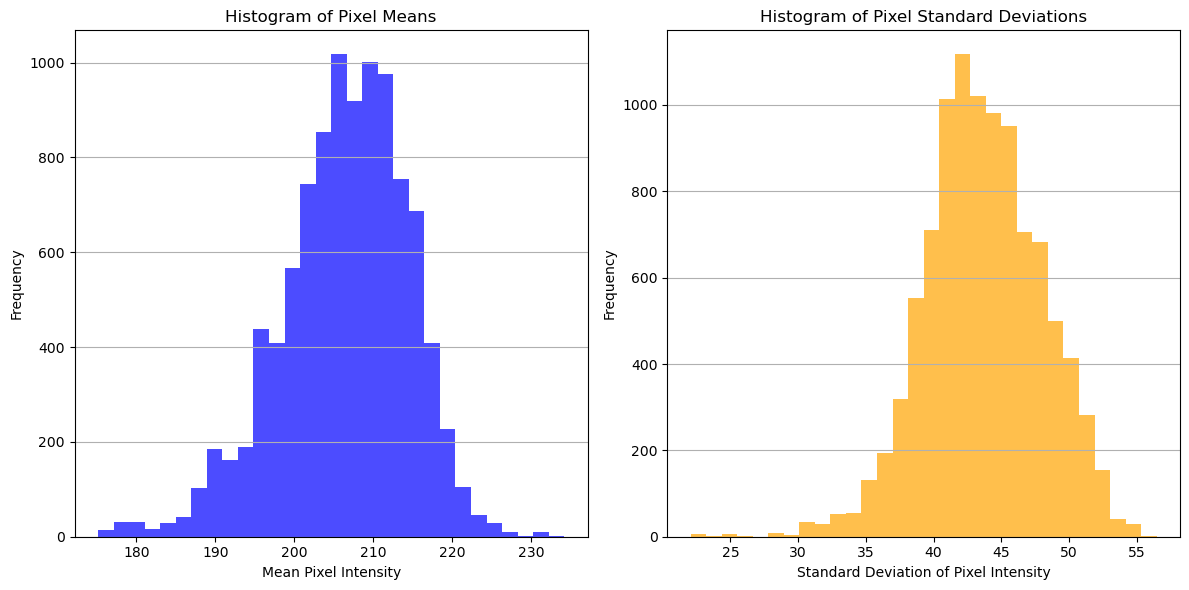

In [31]:
# Plotting the mean and standard deviation of pixel intensities
plt.figure(figsize=(12, 6))

# Plot Mean
plt.subplot(1, 2, 1)
plt.hist(pixel_means, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Pixel Means')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Plot Standard Deviation
plt.subplot(1, 2, 2)
plt.hist(pixel_stds, bins=30, color='orange', alpha=0.7)
plt.title('Histogram of Pixel Standard Deviations')
plt.xlabel('Standard Deviation of Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [33]:
# Check the data types
print(df.dtypes)


image_path    object
label          int64
exists          bool
dtype: object


In [34]:
print(df['label'].unique())

[1 0]


In [35]:
print(df.head())  #

                                          image_path  label  exists
0  Colon_image_set/colon_image_sets/colon_aca/col...      1    True
1  Colon_image_set/colon_image_sets/colon_aca/col...      1    True
2  Colon_image_set/colon_image_sets/colon_aca/col...      1    True
3  Colon_image_set/colon_image_sets/colon_aca/col...      1    True
4  Colon_image_set/colon_image_sets/colon_aca/col...      1    True


In [36]:
print(df['label'].value_counts())

label
1    5000
0    5000
Name: count, dtype: int64


In [37]:
print(df.isnull().sum())

image_path    0
label         0
exists        0
dtype: int64


In [39]:
# Define the directory containing colon cancer image sets
data_dir = 'Colon_image_set/colon_image_sets'
filepaths = []
labels = []

# Get the list of classes (subdirectories)
classes = os.listdir(data_dir)
for fold in classes:
    foldpath = os.path.join(data_dir, fold)
    
    # Check if the fold is a directory
    if os.path.isdir(foldpath):
        for file in os.listdir(foldpath):
            # Append the full file path and corresponding label
            filepaths.append(os.path.join(foldpath, file))
            labels.append(fold)

# Create a DataFrame from the lists
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Display the first few rows of the DataFrame
print(df.head())

# Check the distribution of classes
print(df['labels'].value_counts())


                                           filepaths     labels
0  Colon_image_set/colon_image_sets\colon_aca\col...  colon_aca
1  Colon_image_set/colon_image_sets\colon_aca\col...  colon_aca
2  Colon_image_set/colon_image_sets\colon_aca\col...  colon_aca
3  Colon_image_set/colon_image_sets\colon_aca\col...  colon_aca
4  Colon_image_set/colon_image_sets\colon_aca\col...  colon_aca
labels
colon_aca    5000
colon_n      5000
Name: count, dtype: int64


In [40]:
# Separate images by class
colon_aca = df[df['labels'] == 'colon_aca']
colon_n = df[df['labels'] == 'colon_n']

# Calculate the number of images for training and testing
total_colon_aca = len(colon_aca)
total_colon_n = len(colon_n)

train_size_70_aca = int(0.7 * total_colon_aca)
train_size_70_n = int(0.7 * total_colon_n)


# Create training and testing sets
train_colon_aca = colon_aca.iloc[:train_size_70_aca]
test_colon_aca = colon_aca.iloc[train_size_70_aca:]

train_colon_n = colon_n.iloc[:train_size_70_n]
test_colon_n = colon_n.iloc[train_size_70_n:]


In [41]:
# Combine training and testing sets# Separate images by class
colon_aca = df[df['labels'] == 'colon_aca']
colon_n = df[df['labels'] == 'colon_n']

# Calculate the number of images for training and testing
total_colon_aca = len(colon_aca)
total_colon_n = len(colon_n)

train_size_70_aca = int(0.7 * total_colon_aca)
train_size_70_n = int(0.7 * total_colon_n)


# Create training and testing sets
train_colon_aca = colon_aca.iloc[:train_size_70_aca]
test_colon_aca = colon_aca.iloc[train_size_70_aca:]

train_colon_n = colon_n.iloc[:train_size_70_n]
test_colon_n = colon_n.iloc[train_size
train_df = pd.concat([train_colon_aca, train_colon_n], ignore_index=True)
test_df = pd.concat([test_colon_aca, test_colon_n], ignore_index=True)

# Print the sizes of the training and testing sets
print(f"Training set size: {len(train_df)}")
print(f"Testing set size: {len(test_df)}")

Training set size: 7000
Testing set size: 3000


In [42]:
# Check the distribution in the training set
print(train_df['labels'].value_counts())

labels
colon_aca    3500
colon_n      3500
Name: count, dtype: int64


In [43]:
print(train_df.columns)
print(test_df.columns)

Index(['filepaths', 'labels'], dtype='object')
Index(['filepaths', 'labels'], dtype='object')


In [86]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [52]:
# Combine the training and testing sets
train_data = pd.concat([train_colon_aca, train_colon_n], ignore_index=True)
test_data = pd.concat([test_colon_aca, test_colon_n], ignore_index=True)


In [53]:
# Step 2: Create Data Generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [55]:
# Define image dimensions
image_height = 128  # Set your desired height
image_width = 128   # Set your desired width

In [74]:
# Create data generators
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
)

Found 7000 validated image filenames belonging to 2 classes.
Found 3000 validated image filenames belonging to 2 classes.


In [76]:
print(train_generator.class_indices)

{'colon_aca': 0, 'colon_n': 1}


In [78]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [79]:
# Define the number of classes
num_classes = 2  #

In [87]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Changed to 2 units for two classes
])

In [88]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'binary_crossentropy' if using sigmoid
              metrics=['accuracy'])


In [89]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)      

In [90]:
history = model.fit(train_generator, epochs=10, validation_data=test_generator)

Epoch 1/10
219/219 [==============================] - 458s 2s/step - loss: 0.7578 - accuracy: 0.4964 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
219/219 [==============================] - 590s 3s/step - loss: 0.6932 - accuracy: 0.5014 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
219/219 [==============================] - 493s 2s/step - loss: 0.6933 - accuracy: 0.4874 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
219/219 [==============================] - 517s 2s/step - loss: 0.6932 - accuracy: 0.5023 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/10
219/219 [==============================] - 723s 3s/step - loss: 0.6932 - accuracy: 0.4906 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
219/219 [==============================] - 748s 3s/step - loss: 0.6932 - accuracy: 0.4881 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
219/219 [==============================] - 466s 2s/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6932 - val_accuracy: 0.5000

In [91]:
print("Training History:")
print("Training Loss:", history.history['loss'][-1])

print("Validation Loss:", history.history['val_loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

Training History:
Training Loss: 0.6932700872421265
Validation Loss: 0.6931479573249817
Training Accuracy: 0.4974285662174225
Validation Accuracy: 0.5


In [92]:
# 1. Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


94/94 [==============================] - 73s 772ms/step - loss: 0.6931 - accuracy: 0.5000
Test Loss: 0.6931
Test Accuracy: 0.5000


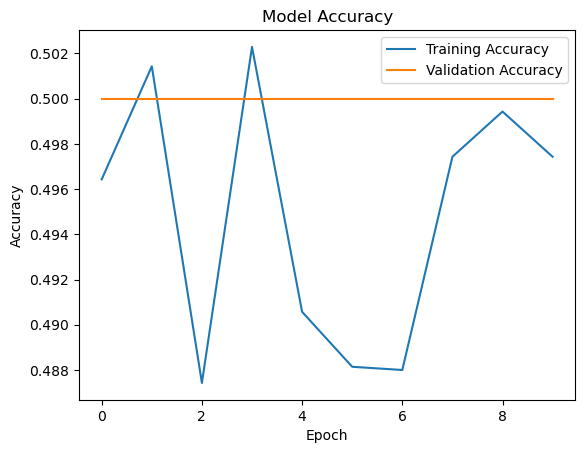

In [93]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

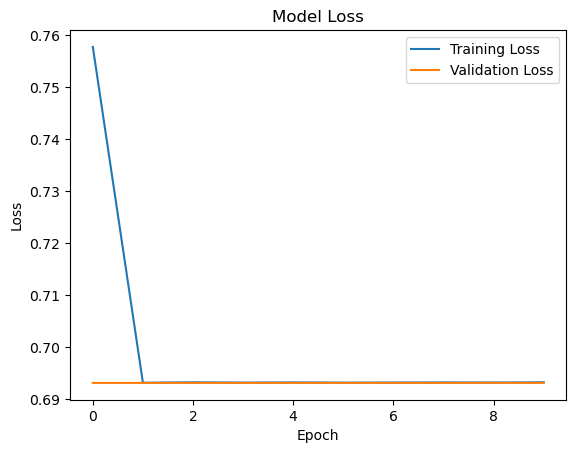

In [94]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [95]:
test_generator.reset()  # Reset the test generator to ensure predictions are made on all data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get True Classes
true_classes = test_generator.classes

# Step 3: Create Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)


94/94 [==============================] - 63s 667ms/step


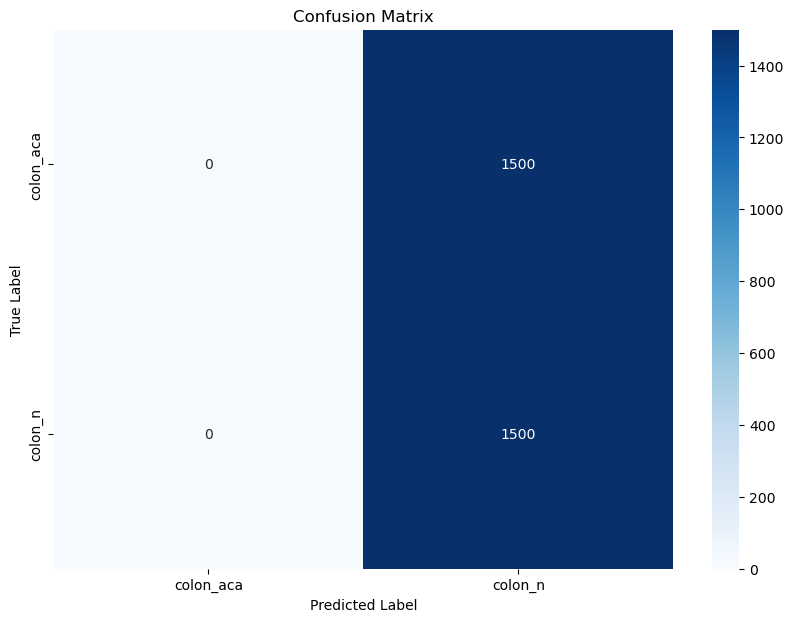

In [96]:
# Step 4: Visualize Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

In [97]:
from sklearn.metrics import precision_score, recall_score


In [98]:
# Generate predictions on the test set
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Get True Classes
true_classes = test_generator.classes

# Step 3: Calculate Precision and Recall
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')

94/94 [==============================] - 61s 648ms/step


C:\Users\gillb\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [99]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

Precision: 0.2500
Recall: 0.5000


In [101]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

In [102]:
# Step 2: Classification Report
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print("Classification Report:\n", report)

# Step 3: Precision, Recall, and F1 Score
precision = precision_score(true_classes, predicted_classes, average='weighted')
recall = recall_score(true_classes, predicted_classes, average='weighted')
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Classification Report:
               precision    recall  f1-score   support

   colon_aca       0.00      0.00      0.00      1500
     colon_n       0.50      1.00      0.67      1500

    accuracy                           0.50      3000
   macro avg       0.25      0.50      0.33      3000
weighted avg       0.25      0.50      0.33      3000

Precision: 0.2500
Recall: 0.5000
F1 Score: 0.3333


C:\Users\gillb\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gillb\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gillb\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\User

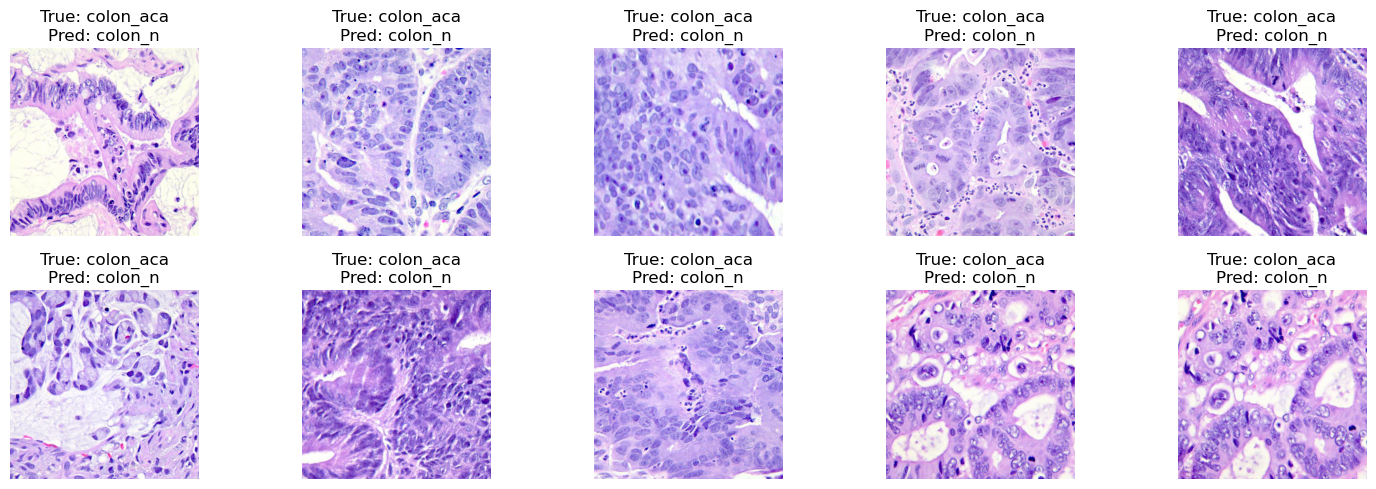

In [104]:
# Set the number of images to display
num_images = min(10, len(misclassified_indices))  # Show up to 10 misclassified images

# Create a figure to display misclassified images
plt.figure(figsize=(15, 5))

# Convert class indices to a list for easier access
class_labels = list(test_generator.class_indices.keys())

for i, index in enumerate(misclassified_indices[:num_images]):
    plt.subplot(2, 5, i + 1)  # Adjust the layout as needed
    img = plt.imread(test_generator.filepaths[index])  # Load the misclassified image
    plt.imshow(img)
    plt.title(f'True: {class_labels[true_classes[index]]}\nPred: {class_labels[predicted_classes[index]]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [105]:
# Total number of predictions
total_predictions = len(predicted_classes)

# Number of correct predictions
correct_predictions = np.sum(predicted_classes == true_classes)

# Number of incorrect predictions
wrong_predictions = total_predictions - correct_predictions

# Output the results
print(f'Total Predictions: {total_predictions}')
print(f'Correct Predictions: {correct_predictions}')
print(f'Wrong Predictions: {wrong_predictions}')

Total Predictions: 3000
Correct Predictions: 1500
Wrong Predictions: 1500


In [109]:
from sklearn.metrics import roc_curve, auc


In [110]:
# Get true labels and predicted probabilities
y_true = test_generator.classes  # True labels
y_pred_prob = model.predict(test_generator)[:, 1]  # Get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)  

94/94 [==============================] - 60s 641ms/step


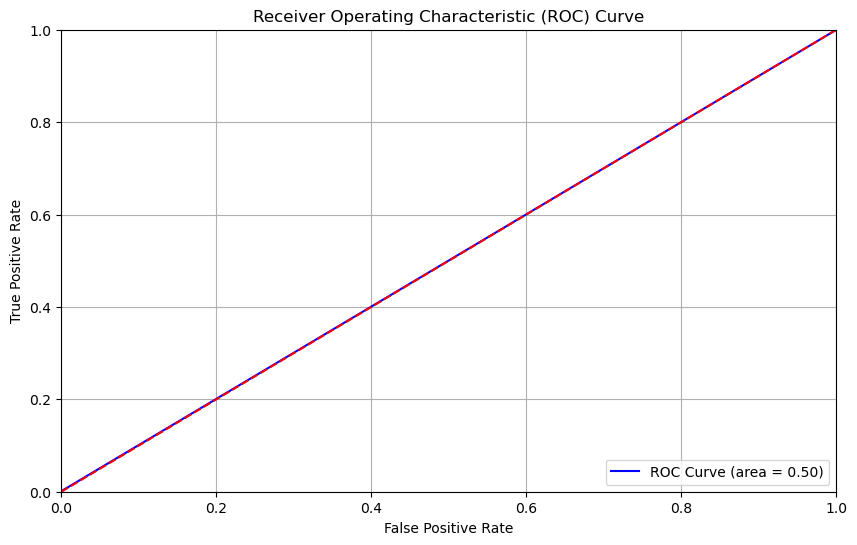

In [111]:
# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()